# CSCE 633 :: Machine Learning :: Texas A&M University :: Fall 2023

# Homework 3 (HW-3)
**Name: Siddharrth Priyadharsan Muthusamy**  
**UIN: 434002400 **  

### Question 1 : Machine Learning for object recognition

In [272]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
import time

from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from typing import Tuple

import matplotlib.pyplot as plot
import tensorflow as tf
from keras.datasets import cifar10
from skimage.color import rgb2gray
from keras import regularizers, Input, layers
from keras.layers import Flatten, Dropout, Dense
from keras.models import Sequential

### 1A: Visualization

In this section, we would visualize the original, grayscale and normalized grayscale versions of the first 8 images. 

Shape of original training input
(50000, 32, 32, 3)
Shape of grayscale training input
(50000, 32, 32)
Shape of grayscale test input
(10000, 32, 32)
Shape of normalized grayscale training input
(50000, 32, 32)


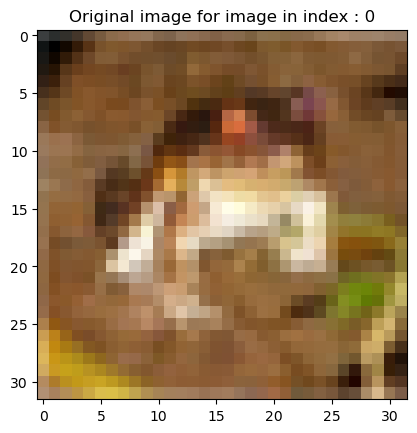

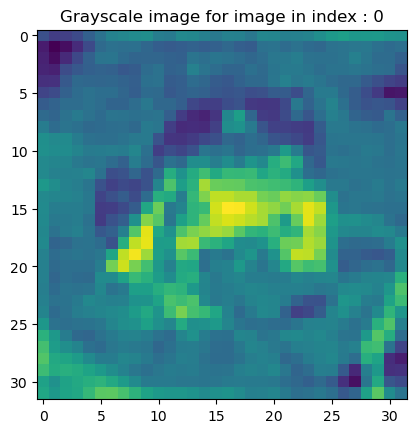

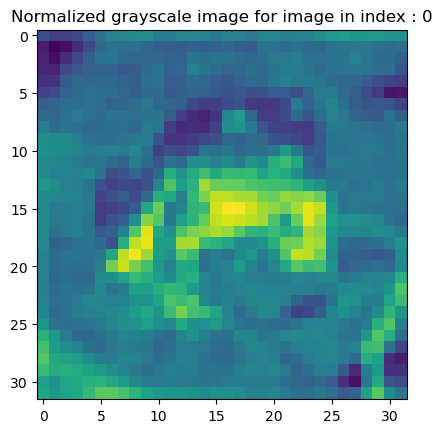

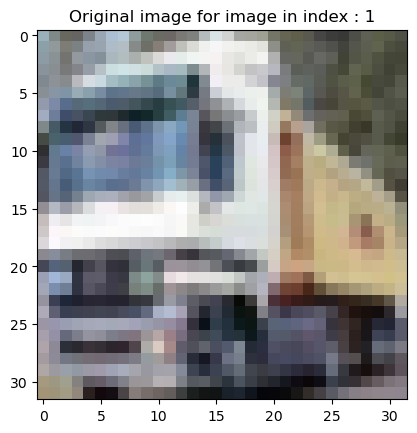

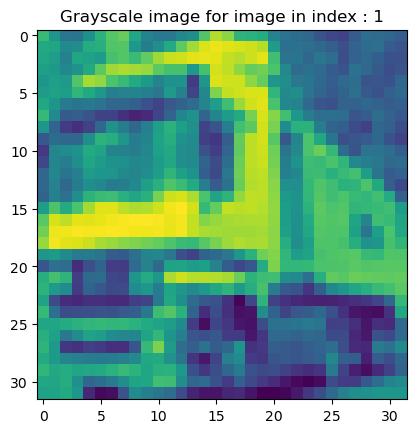

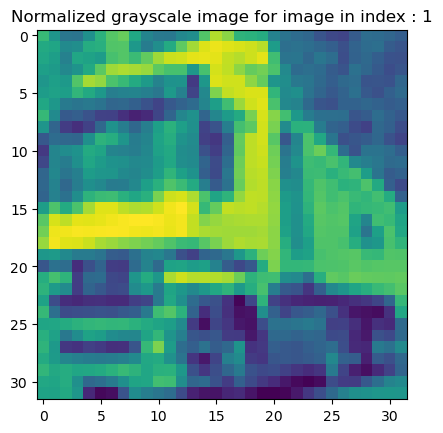

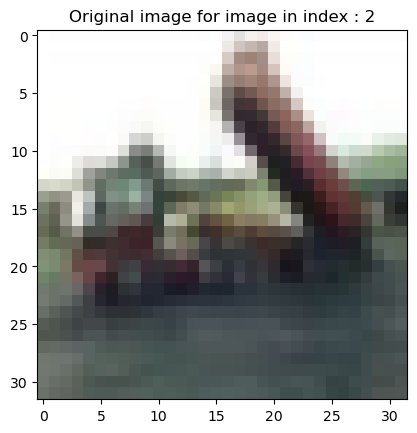

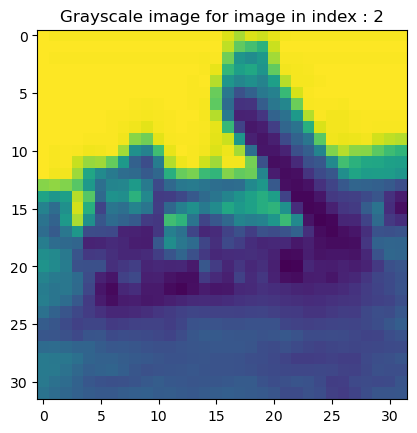

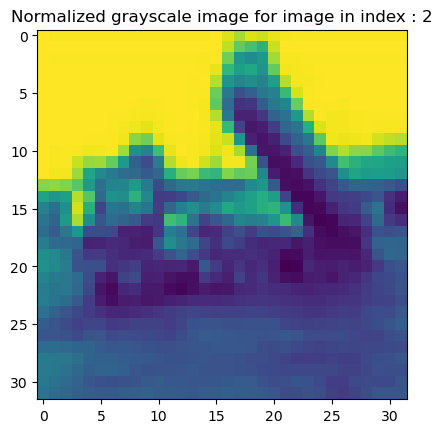

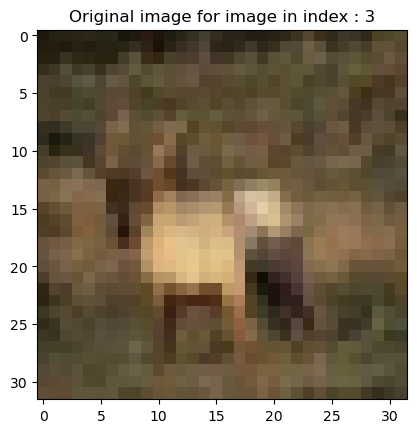

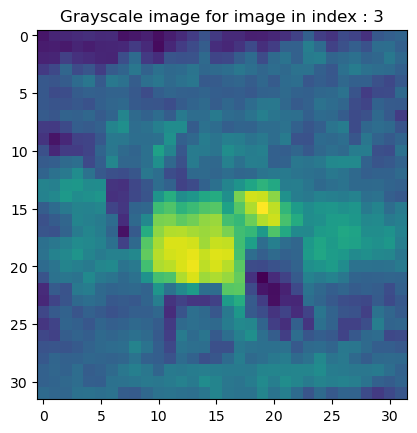

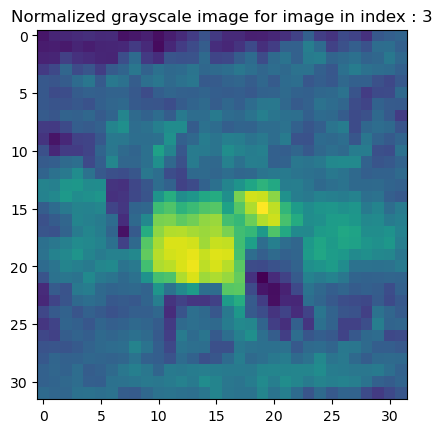

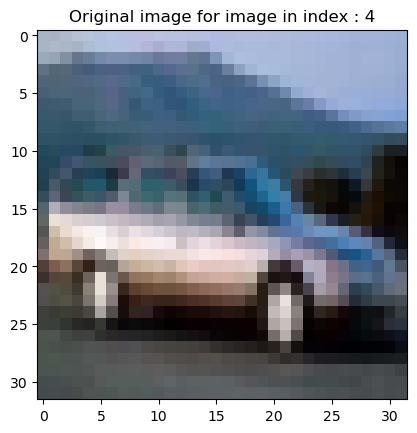

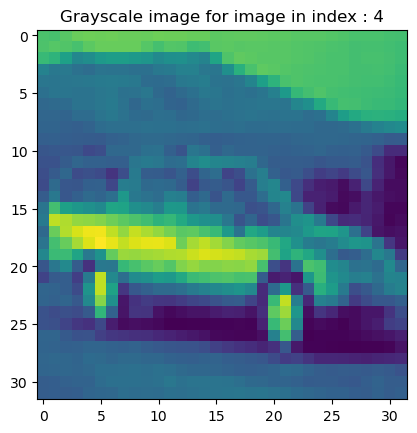

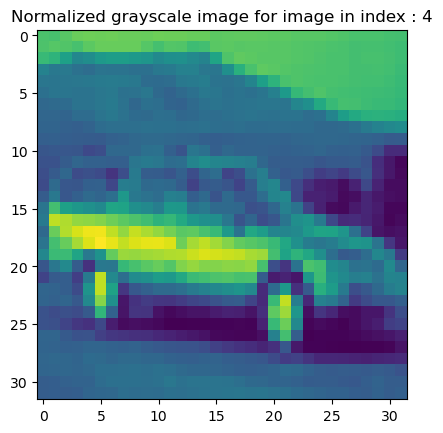

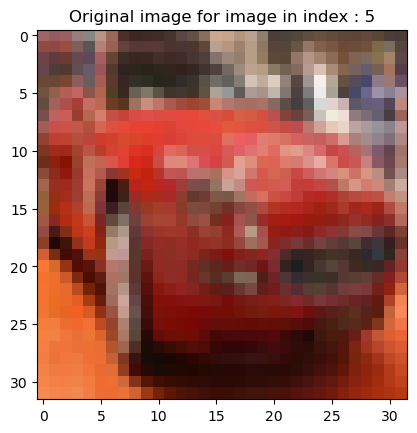

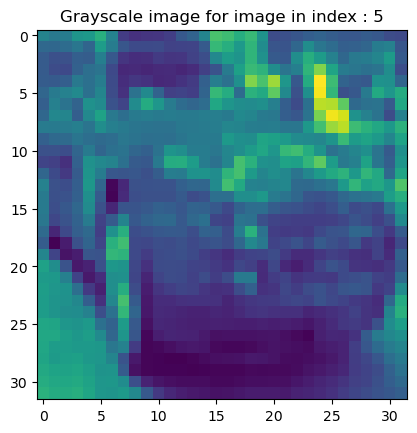

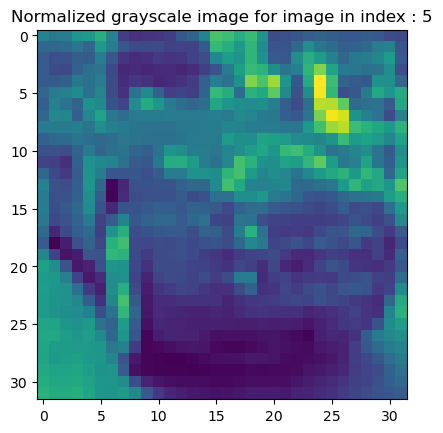

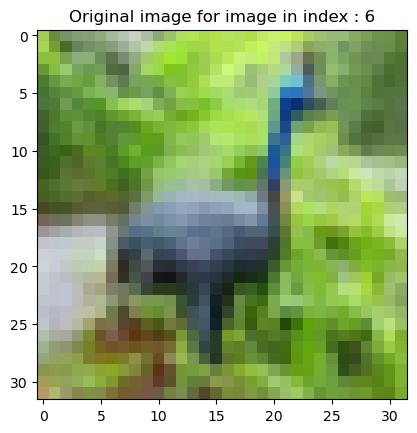

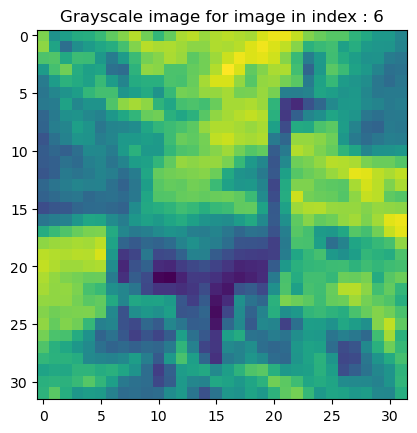

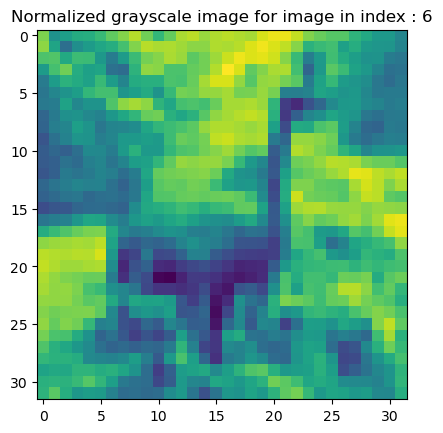

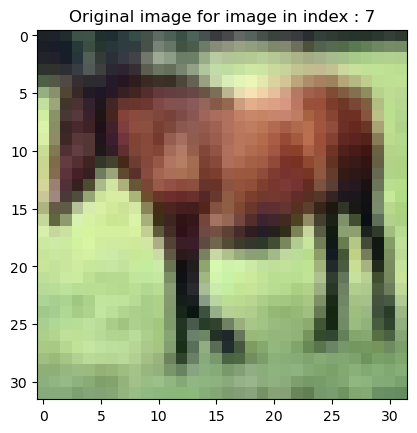

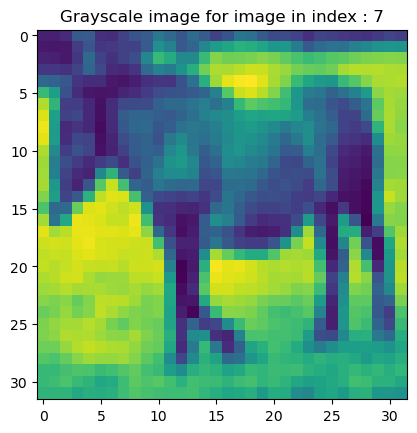

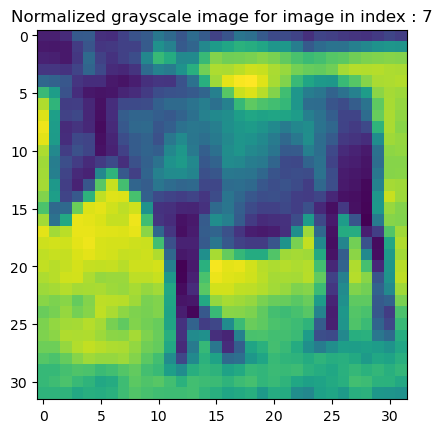

In [273]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of original training input")
print(X_train.shape)

# converting the training and testing images to grayscale
X_train_grayscale = rgb2gray(X_train)
X_test_grayscale = rgb2gray(X_test)

print("Shape of grayscale training input")
print(X_train_grayscale.shape)

print("Shape of grayscale test input")
print(X_test_grayscale.shape)

# Normalizing the grayscale images
X_train_normalized_grayscale = tf.image.per_image_standardization(X_train_grayscale)
X_test_normalized_grayscale = tf.image.per_image_standardization(X_test_grayscale)

print("Shape of normalized grayscale training input")
print(X_train_normalized_grayscale.shape)

# Visualizing the first 7 images (original, grayscale, normalized grayscale) in the training sample set
for i in range(8):
    plot.imshow(X_train[i])
    plot.title("Original image for image in index : " + str(i))
    plot.show()
    plot.imshow(X_train_grayscale[i])
    plot.title("Grayscale image for image in index : " + str(i))
    plot.show()
    plot.imshow(X_train_normalized_grayscale[i])
    plot.title("Normalized grayscale image for image in index : " + str(i))
    plot.show()
    print()
    print()


### 1B: Data exploration

In this section, we would calculate the number of samples per class in the training data.

In [274]:
y_len = len(y_train)

# Creating a dictionary to map output numerical label to output string
class_to_label_map = {}
class_to_label_map[0] = "airplane"
class_to_label_map[1] = "automobile"
class_to_label_map[2] = "bird"
class_to_label_map[3] = "cat"
class_to_label_map[4] = "deer"
class_to_label_map[5] = "dog"
class_to_label_map[6] = "frog"
class_to_label_map[7] = "horse"
class_to_label_map[8] = "ship"
class_to_label_map[9] = "truck"

# This will keep track of the number of samples corresponding to each output class
class_count = {}

# Calculating the number of training samples corresponding to each class
for i in range(y_len):
    class_value = y_train[i]
    #print(class_value[0])
    if class_value[0] in class_count:
        class_count[class_value[0]] = class_count[class_value[0]] + 1
    else:
        class_count[class_value[0]] = 1


print("No of samples per class in the training dataset are as follows:")
# Printing the number of training samples corresponding to each class
for i in range(10):
    print("Class name = " + class_to_label_map[i] + ", number of samples = " + str(class_count[i]))


No of samples per class in the training dataset are as follows:
Class name = airplane, number of samples = 5000
Class name = automobile, number of samples = 5000
Class name = bird, number of samples = 5000
Class name = cat, number of samples = 5000
Class name = deer, number of samples = 5000
Class name = dog, number of samples = 5000
Class name = frog, number of samples = 5000
Class name = horse, number of samples = 5000
Class name = ship, number of samples = 5000
Class name = truck, number of samples = 5000


### 1C.i : Image classification with FNNs

In [275]:
# Number of output classes
classes_count = 10

x_testing = X_test
y_testing = y_test

# splitting the training data into 4 parts of training dataset and 1 part of validation dataset
x_training, x_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# converting the images to normalized grayscale
# training dataset
x_training = rgb2gray(x_training)
x_training = x_training.astype("float32") / 255
# validatin dataset
x_validation = rgb2gray(x_validation)
x_validation = x_validation.astype("float32") / 255
# testing dataset
x_testing = rgb2gray(x_testing)
x_testing = x_testing.astype("float32") / 255
#x_training = tf.image.per_image_standardization(x_training)

# output label data (training, testing and validation datasets)
y_training = tf.keras.utils.to_categorical(y_training, classes_count)
y_testing = tf.keras.utils.to_categorical(y_testing, classes_count)
y_validation = tf.keras.utils.to_categorical(y_validation, classes_count)

shape_of_input = (32, 32, 1)
epochs = 35
batch_size = 32

print("Shape of training input")
print(x_training.shape)

# Building the first FNN model
# The first model contains one hidden layer with 64 nodes and uses ReLU activation function and L2 weight regularizer
# In the final layer, the number of nodes will be 10, and the activation function used is Softmax function
# the FNN model takes the input and flattens it
fnnModel1 = Sequential()
# flattening operation
fnnModel1.add(Flatten(input_shape=shape_of_input))

# Adding the first layer (hidden) with ReLU activation, 64 nodes and weight regularizer (L2)
fnnModel1.add(Dense(units=64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

# Adding the output layer with softmax activation and 10 nodes
fnnModel1.add(Dense(units=classes_count, activation="softmax"))

fnnModel1.summary()

# compiling the model using categorical cross entropy as the loss function
fnnModel1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the FNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model1Metrics = fnnModel1.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the FNN model = " + str(fnnModel1.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = fnnModel1.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 1 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 1 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 1 wrt validation dataset = " + str(sum(model1Metrics.history["val_accuracy"])/len(model1Metrics.history["val_accuracy"])))
print("Loss of model 1 wrt validation dataset = " + str(sum(model1Metrics.history["val_loss"])/len(model1Metrics.history["val_loss"])))
print()
evaluation_score_test_data = fnnModel1.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 1 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 1 wrt test dataset = " + str(evaluation_score_test_data[0]))


Shape of training input
(40000, 32, 32)
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_96 (Flatten)        (None, 1024)              0         
                                                                 
 dense_242 (Dense)           (None, 64)                65600     
                                                                 
 dense_243 (Dense)           (None, 10)                650       
                                                                 
Total params: 66250 (258.79 KB)
Trainable params: 66250 (258.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/35
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3229 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0973
Epoch 2/35
1250/1250 [==============================] - 1s 859us/step - loss: 2.3028 - accurac

In [193]:
#In the second FNN model, we have 3 hidden layers with 64, 128 and 64 nodes respectively, 
#and we use ReLU activation functions with L2 weight regularization in the third hidden layer
# we do have a dropout layer, and the final layer will have 10 nodes (no of output classes) 
# and uses softmax activation function

# Building the second FNN model
# the FNN model takes the input and flattens it
fnnModel2 = Sequential()
fnnModel2.add(Flatten(input_shape=shape_of_input))

# Adding a hidden layer with RELU activation function and 64 nodes
fnnModel2.add(Dense(units=64, activation="relu"))

# Adding another hidden layer with RELU activation function and 128 nodes
fnnModel2.add(Dense(units=128, activation="relu"))

# Adding another hidden layer with L2 weight regularization
fnnModel2.add(Dense(units=64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

# Adding a dropout layer
fnnModel2.add(Dropout(0.3))

# Adding the output layer with softmax activation and 10 nodes
fnnModel2.add(Dense(units=classes_count, activation="softmax"))

fnnModel2.summary()

fnnModel2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the FNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model2Metrics = fnnModel2.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the FNN model = " + str(fnnModel2.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = fnnModel2.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 2 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 2 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 2 wrt validation dataset = " + str(sum(model2Metrics.history["val_accuracy"])/len(model2Metrics.history["val_accuracy"])))
print("Loss of model 2 wrt validation dataset = " + str(sum(model2Metrics.history["val_loss"])/len(model2Metrics.history["val_loss"])))
print()
evaluation_score_test_data = fnnModel2.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 2 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 2 wrt test dataset = " + str(evaluation_score_test_data[0]))

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 1024)              0         
                                                                 
 dense_128 (Dense)           (None, 64)                65600     
                                                                 
 dense_129 (Dense)           (None, 128)               8320      
                                                                 
 dense_130 (Dense)           (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_131 (Dense)           (None, 10)                650       
                                                                 
Total params: 82826 (323.54 KB)
Trainable params: 828

In [252]:
#In the third FNN model, we have 3 hidden layers with 64, 128 and 256 nodes respectively, 
#and we use ReLU activation functions for the first, second and third 
#hidden layers respectively.
# we do have 2 dropout layers (before and after the final hidden layer), 
# and the final layer will have 10 nodes (no of output classes) 
# and uses softmax activation function

# Building the third FNN model
# the FNN model takes the input and flattens it
fnnModel3 = Sequential()
fnnModel3.add(Flatten(input_shape=shape_of_input))

# Adding a hidden layer with RELU activation function and 64 nodes
fnnModel3.add(Dense(units=64, activation="relu"))

# Adding another hidden layer with RELU activation function and 128 nodes
fnnModel3.add(Dense(units=128, activation="relu"))

# Adding a dropout layer
fnnModel3.add(Dropout(0.3))

# Adding one more hidden layer with RELU activation function and 256 nodes
fnnModel3.add(Dense(units=256, activation="relu"))

# Adding a dropout layer
fnnModel3.add(Dropout(0.3))

# Adding the output layer with softmax activation and 10 nodes
fnnModel3.add(Dense(units=classes_count, activation="softmax"))

fnnModel3.summary()

fnnModel3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the FNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model3Metrics = fnnModel3.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the FNN model = " + str(fnnModel3.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = fnnModel3.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 3 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 3 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 3 wrt validation dataset = " + str(sum(model3Metrics.history["val_accuracy"])/len(model3Metrics.history["val_accuracy"])))
print("Loss of model 3 wrt validation dataset = " + str(sum(model3Metrics.history["val_loss"])/len(model3Metrics.history["val_loss"])))
print()
evaluation_score_test_data = fnnModel3.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 3 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 3 wrt test dataset = " + str(evaluation_score_test_data[0]))



Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_82 (Flatten)        (None, 1024)              0         
                                                                 
 dense_202 (Dense)           (None, 64)                65600     
                                                                 
 dense_203 (Dense)           (None, 128)               8320      
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_204 (Dense)           (None, 256)               33024     
                                                                 
 dropout_45 (Dropout)        (None, 256)               0         
                                                                 
 dense_205 (Dense)           (None, 10)              

With respect to training the above 3 models (fnnModel1, fnnModel2, fnnModel3) and monitoring the loss on the train and validation set across the epochs of the FNN training, the loss value decreases as the epoch value progresses from 0 to 35.

### 1C.ii : classification accuracy and confusion matrix


With respect to Model 1, 2 and 3, Model 3 (fnnModel3) has the highest classification accuracy on the validation dataset, and hence is the best model. 

Accuracy of model 3 wrt training dataset = 0.3884750008583069

Accuracy of model 3 wrt validation dataset = 0.3296914309263229

Accuracy of model 3 wrt testing dataset = 0.37439998984336853

In the below section, we will generate the confusion matrix corresponding to Model 3 (fnnModel3) for testing dataset

313/313 [==============================] - 0s 480us/step


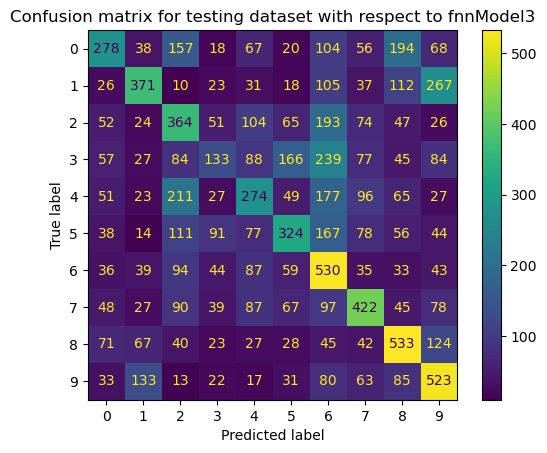

In [254]:
# fetching the output labels corresponding to the test dataset for fnnModel3
y_predicted = fnnModel3.predict(x_testing)
y_predicted_classes = np.argmax(y_predicted, axis=1)
# fetching the original labels for the test dataset
y_true_classes = np.argmax(y_testing, axis=1)

# Plotting the confusion matrix
confusion_matrix_object = confusion_matrix(y_true_classes, y_predicted_classes)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_object)
matrix_display.plot()
#plot_graph.xlabel("True label")
#plot_graph.ylabel("Predicted label")
plot_graph.title("Confusion matrix for testing dataset with respect to fnnModel3")
plot_graph.show()

### 1D : Image classification with CNNs

In [259]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
import time

from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from typing import Tuple

import matplotlib.pyplot as plot
import tensorflow as tf
from keras.datasets import cifar10
from skimage.color import rgb2gray
from keras import regularizers, Input, layers
from keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential

In this section, the datasets (training, testing and validation) will be generated, and the first CNN model (cnnModel1) is built, processed and evaluated with respect to these datasets.

For this model, we are caliberating the following:
1) filter size
2) kernel size
3) activation function
4) dropout

In [266]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes_count = 10

x_testing = X_test
y_testing = y_test

# splitting the training data into 4 parts of training dataset and 1 part of validation dataset
x_training, x_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# converting the images to normalized grayscale
# training dataset
x_training = rgb2gray(x_training)
x_training = x_training.astype("float32") / 255

# validation dataset
x_validation = rgb2gray(x_validation)
x_validation = x_validation.astype("float32") / 255

# testing dataset
x_testing = rgb2gray(x_testing)
x_testing = x_testing.astype("float32") / 255

# outputs corresponding to testing, training and validation datasets
y_training = tf.keras.utils.to_categorical(y_training, classes_count)
y_testing = tf.keras.utils.to_categorical(y_testing, classes_count)
y_validation = tf.keras.utils.to_categorical(y_validation, classes_count)

shape_of_input = (32, 32, 1)
pool = (2, 2)

epochs = 35
batch_size = 32

# filter size is a hyper paramater that can be toggled
filter_size1 = 32
filter_size2 = 64
filter_size3 = 128

# kernel size is another hyper parameter which we would be caliberating
kernel_size1 = (5,5)
kernel_size2 = (3,3)

# Stride size is another hyper paramater that will be caliberated
stride_size1 = (1,1)
stride_size2 = (2,2)

print("Shape of training input")
print(x_training.shape)

# Building the first CNN model
# the CNN model takes the input and flattens it
cnnModel1 = Sequential()

# adding Conv2D layer with 128 filters, (3,3) kernel and ELU activation function
cnnModel1.add(Conv2D(filters=filter_size3, kernel_size=kernel_size2, strides=stride_size1, input_shape=shape_of_input, activation="elu"))
# maxpooling 2D layer
cnnModel1.add(MaxPooling2D(pool_size=pool))
# flattening process
cnnModel1.add(Flatten())
# adding a dropout layer
cnnModel1.add(Dropout(0.3))

# Adding a dense hidden layer with 128 nodes and ELU activation function
cnnModel1.add(Dense(units=128, activation="elu"))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel1.add(Dense(units=classes_count, activation="softmax"))

cnnModel1.summary()

cnnModel1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model1Metrics = cnnModel1.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel1.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = cnnModel1.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 1 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 1 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 1 wrt validation dataset = " + str(sum(model1Metrics.history["val_accuracy"])/len(model1Metrics.history["val_accuracy"])))
print("Loss of model 1 wrt validation dataset = " + str(sum(model1Metrics.history["val_loss"])/len(model1Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel1.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 1 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 1 wrt test dataset = " + str(evaluation_score_test_data[0]))

Shape of training input
(40000, 32, 32)
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_91 (Flatten)        (None, 28800)             0         
                                                                 
 dropout_53 (Dropout)        (None, 28800)             0         
                                                                 
 dense_227 (Dense)           (None, 128)               3686528   
                                                                 
 dense_228 (Dense)           (None, 10)                1290      
             

In this section, we will see the second CNN model (cnnModel2) getting built and evaluated with respect to these datasets.

For this model, we are caliberating the following parameters:
1) filter size
2) kernel size
3) No of layers
4) dropout
5) activation function
6) no of nodes in the layers

In [269]:
# Building the second CNN model
# the CNN model takes the input and flattens it
cnnModel2 = Sequential()

# adding Conv2D layer with 128 filters, (3,3) kernel and ELU activation function
cnnModel2.add(Conv2D(filters=filter_size3, kernel_size=kernel_size2, strides=stride_size1, input_shape=shape_of_input, activation="elu"))
# maxpooling 2D layer
cnnModel2.add(MaxPooling2D(pool_size=pool))

# adding Conv2D layer with 128 filters, (5,5) kernel and ELU activation function
cnnModel2.add(Conv2D(filters=filter_size3, kernel_size=kernel_size2, strides=stride_size1, input_shape=shape_of_input, activation="elu"))
# maxpooling 2D layer
cnnModel2.add(MaxPooling2D(pool_size=pool))

# flattening process
cnnModel2.add(Flatten())
# adding a dropout layer
cnnModel2.add(Dropout(0.3))

# Adding a dense hidden layer with 256 nodes and ELU activation function
cnnModel2.add(Dense(units=256, activation="elu"))
# Adding a dense hidden layer with 256 nodes and ELU activation function
cnnModel2.add(Dense(units=256, activation="elu"))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel2.add(Dense(units=classes_count, activation="softmax"))

cnnModel2.summary()

cnnModel2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model2Metrics = cnnModel2.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel2.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = cnnModel2.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 2 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 2 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 2 wrt validation dataset = " + str(sum(model2Metrics.history["val_accuracy"])/len(model2Metrics.history["val_accuracy"])))
print("Loss of model 2 wrt validation dataset = " + str(sum(model2Metrics.history["val_loss"])/len(model2Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel2.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 2 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 2 wrt test dataset = " + str(evaluation_score_test_data[0]))

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_93 (Flatten)        (None, 4608)              0         
                                                                 
 dropout_55 (Dropout)        (None, 4608)           

In this section, we will see the third CNN model (cnnModel3) getting built and evaluated with respect to these datasets.

For this model, we are caliberating the following parameters:
1) filter size
2) kernel size
3) No of layers
4) dropout
5) activation function
6) no of nodes in the layers

In [271]:
# Building the third CNN model
# the CNN model takes the input and flattens it
cnnModel3 = Sequential()

# adding Conv2D layer with 128 filters, (5,5) kernel and ELU activation function
cnnModel3.add(Conv2D(filters=filter_size3, kernel_size=kernel_size2, strides=stride_size1, input_shape=shape_of_input, activation="elu"))
# maxpooling 2D layer
cnnModel3.add(MaxPooling2D(pool_size=pool))

# adding Conv2D layer with 128 filters, (5,5) kernel and ELU activation function
cnnModel3.add(Conv2D(filters=filter_size3, kernel_size=kernel_size2, strides=stride_size1, input_shape=shape_of_input, activation="elu"))
# maxpooling 2D layer
cnnModel3.add(MaxPooling2D(pool_size=pool))

# flattening process
cnnModel3.add(Flatten())
# adding a dropout layer
cnnModel3.add(Dropout(0.5))

# Adding a dense hidden layer with 128 nodes and ELU activation function and L2 weight regularization
cnnModel3.add(Dense(units=128, activation="elu"))
# Adding a dense hidden layer with 128 nodes and ELU activation function
cnnModel3.add(Dense(units=128, activation="elu"))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel3.add(Dense(units=classes_count, activation="softmax"))

cnnModel3.summary()

cnnModel3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model3Metrics = cnnModel3.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel3.count_params()))
print()
# calculating the accuracy and loss for training, testing and validation datasets
evaluation_score_training_data = cnnModel3.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 3 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 3 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 3 wrt validation dataset = " + str(sum(model3Metrics.history["val_accuracy"])/len(model3Metrics.history["val_accuracy"])))
print("Loss of model 3 wrt validation dataset = " + str(sum(model3Metrics.history["val_loss"])/len(model3Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel3.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 3 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 3 wrt test dataset = " + str(evaluation_score_test_data[0]))

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_95 (Flatten)        (None, 4608)              0         
                                                                 
 dropout_57 (Dropout)        (None, 4608)           

### 1D.i and 1D.ii Comparison between FNN and CNN

Following are the metrics for the 3 FNN models and 3 CNN models:

FNN

fnnModel1:

Accuracy of model 1 wrt training dataset = 0.13660000264644623

Accuracy of model 1 wrt validation dataset = 0.11121428608894349

Accuracy of model 1 wrt test dataset = 0.1386999934911728

Running time for training the model (in seconds) = 35.5643630027771

Number of parameters learned for the FNN model = 66250



fnnModel2:

Accuracy of model 2 wrt training dataset = 0.2662000060081482

Accuracy of model 2 wrt validation dataset = 0.22784285843372346

Accuracy of model 2 wrt test dataset = 0.26820001006126404

Running time for training the model (in seconds) = 39.636760234832764

Number of parameters learned for the FNN model = 82826


fnnModel3:

Accuracy of model 3 wrt training dataset = 0.3887999951839447

Accuracy of model 3 wrt validation dataset = 0.33395999925477166

Accuracy of model 3 wrt test dataset = 0.3752000033855438

Running time for training the model (in seconds) = 46.299609899520874

Number of parameters learned for the FNN model = 109514


CNN

cnnModel1:

Accuracy of model 1 wrt training dataset = 0.6862000226974487

Accuracy of model 1 wrt validation dataset = 0.4705799971308027

Accuracy of model 1 wrt test dataset = 0.5302000045776367

Running time for training the model (in seconds) = 983.9596860408783

Number of parameters learned for the CNN model = 3689098 


cnnModel2:

Accuracy of model 2 wrt training dataset = 0.9773499965667725

Accuracy of model 2 wrt validation dataset = 0.5599200001784733

Accuracy of model 2 wrt test dataset = 0.5680000185966492

Running time for training the model (in seconds) = 1923.1235980987549

Number of parameters learned for the CNN model = 1397130


cnnModel3:

Accuracy of model 3 wrt training dataset = 0.9161999821662903

Accuracy of model 3 wrt validation dataset = 0.5570000069481986

Accuracy of model 3 wrt test dataset = 0.5724999904632568

Running time for training the model (in seconds) = 1936.2344908714294

Number of parameters learned for the CNN model = 756618


With respect to classification accuracy on training and validation datasets,
CNN performs much better than FNN (as the max accuracy of the 3 CNN models is much higher than that of the FNN models). The best CNN model (cnnModel2) (57% accuracy) has performed much better than the best FNN model (fnnModel3) (33% accuracy).

With respect to running time for training the model, CNNs took much higher time (1614 secs on average) when compared to that of the FNNs (39 secs on average)

With respect to loss on the train/validation set across the epochs of the training of CNNs and FNNs, it is observed that CNNS has relatively lesser loss when compared to that of FNNs.
In both CNNs and FNNs training, the loss value decreases across the epochs of the training (ie, the loss value decreases as the epoch value progresses from 0 to 35)


With respect to number of parameters that are learned for each FNN, CNNs have higher number of parameters (max number of parameters is 3689098 for cnnModel1) when compared to that of FNNs (max number of parameters is 109514 for fnnModel3).


With respect to classification accuracy on testing datasets, the best CNN model has performed better than the best FNN model.

Best CNN model : cnnModel3 (57.2% accuracy)

Best FNN model : fnnModel3 (37.5% accuracy)


### 1E: Fine-tuning

We would be using MobileNetV2 pretrained CNN model (from tensorflow) as the base model and we will be doing fine-tuning on top of it. Below is the code for creating three new finetuning models on top of the base model - cnnModel4, cnnModel5 and cnnModel6 with different values of hyperparameters (activation function, number of layers, number of nodes in the layer, weight regularization)

In [2]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
import time

from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from typing import Tuple

import matplotlib.pyplot as plot
import tensorflow as tf
from keras.datasets import cifar10
from skimage.color import rgb2gray
from keras import regularizers, Input, layers
from keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In this section, we will load the base CNN model (MobileNetV2) and load the datasets for training, validation and testing. And we will train our first CNN model (using the base CNN model) which would cnnModel4. 

In [ ]:

def resize_images(images):
    resized_images = np.array([resize(img, (224, 224)) for img in images])
    return np.repeat(resized_images[..., np.newaxis], 3, -1)


base_cnn_model = MobileNetV2(weights='imagenet', include_top=True)

#print the summary of the base CNN model
base_cnn_model.summary()

# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes_count = 10

x_testing = X_test
y_testing = y_test

# splitting the training data into 4 parts of training dataset and 1 part of validation dataset
x_training, x_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=10000, random_state=42)

x_training = resize_images(x_training)
x_validation = resize_images(x_validation)
x_testing = resize_images(X_test)

# converting the images to normalized grayscale
# training dataset
#x_training = rgb2gray(x_training)
x_training = x_training.astype("float32") / 255

# validation dataset
#x_validation = rgb2gray(x_validation)
x_validation = x_validation.astype("float32") / 255

# testing dataset
#x_testing = rgb2gray(x_testing)
x_testing = x_testing.astype("float32") / 255

# outputs corresponding to testing, training and validation datasets
y_training = tf.keras.utils.to_categorical(y_training, classes_count)
y_testing = tf.keras.utils.to_categorical(y_testing, classes_count)
y_validation = tf.keras.utils.to_categorical(y_validation, classes_count)

shape_of_input = (32, 32, 1)
pool = (2, 2)

epochs = 20
batch_size = 32

# filter size is a hyper paramater that can be toggled
filter_size1 = 32
filter_size2 = 64
filter_size3 = 128

# kernel size is another hyper parameter which we would be caliberating
kernel_size1 = (5,5)
kernel_size2 = (3,3)

# Stride size is another hyper paramater that will be caliberated
stride_size1 = (1,1)
stride_size2 = (2,2)

# creating a fine-tuning model with MobileNetV2 as the base class
cnnModel4 = Sequential()
cnnModel4.add(base_cnn_model)

# flattening process
cnnModel4.add(Flatten())
# adding a dropout layer
cnnModel4.add(Dropout(0.3))

# Adding a dense hidden layer with 128 nodes and ELU activation function
cnnModel4.add(Dense(units=128, activation="relu"))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel4.add(Dense(units=classes_count, activation="softmax"))

cnnModel4.summary()

cnnModel4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model4Metrics = cnnModel4.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel4.count_params()))
print()
evaluation_score_training_data = cnnModel4.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 4 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 4 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 4 wrt validation dataset = " + str(sum(model4Metrics.history["val_accuracy"])/len(model4Metrics.history["val_accuracy"])))
print("Loss of model 4 wrt validation dataset = " + str(sum(model4Metrics.history["val_loss"])/len(model4Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel4.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 4 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 4 wrt test dataset = " + str(evaluation_score_test_data[0]))

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [4]:
base_cnn_model = MobileNetV2(weights='imagenet', include_top=True)

# creating a fine-tuning model with MobileNetV2 as the base class
cnnModel5 = Sequential()
cnnModel5.add(base_cnn_model)

# flattening process
cnnModel5.add(Flatten())
# adding a dropout layer
cnnModel5.add(Dropout(0.3))

# Adding a dense hidden layer with 128 nodes and RELU activation function
cnnModel5.add(Dense(units=128, activation="elu"))

# Adding a dense hidden layer with 128 nodes and RELU activation function
cnnModel5.add(Dense(units=128, activation="elu"))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel5.add(Dense(units=classes_count, activation="softmax"))

cnnModel5.summary()

cnnModel5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# creating another fine-tuning model with MobileNetV2 as the base class
cnnModel6 = Sequential()
cnnModel6.add(base_cnn_model)

# flattening process
cnnModel6.add(Flatten())
# adding a dropout layer
cnnModel6.add(Dropout(0.3))

# Adding a dense hidden layer with 128 nodes and ELU activation function
cnnModel6.add(Dense(units=256, activation="elu"))

# Adding a dense hidden layer with 128 nodes, ELU activation function and L2 weight regularization
cnnModel6.add(Dense(units=256, activation="elu", kernel_regularizer=regularizers.l2(0.01)))

# Adding the output layer with softmax activation function and 10 nodes
cnnModel6.add(Dense(units=classes_count, activation="softmax"))

cnnModel6.summary()

cnnModel6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'classes_count' is not defined

In [ ]:
# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model5Metrics = cnnModel5.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel5.count_params()))
print()
evaluation_score_training_data = cnnModel5.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 5 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 5 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 5 wrt validation dataset = " + str(sum(model5Metrics.history["val_accuracy"])/len(model5Metrics.history["val_accuracy"])))
print("Loss of model 5 wrt validation dataset = " + str(sum(model5Metrics.history["val_loss"])/len(model5Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel5.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 5 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 5 wrt test dataset = " + str(evaluation_score_test_data[0]))


# training the CNN model, by splitting the training data into 4 parts of training dataset and 1 part of validation dataset
start_time = time.time()
model6Metrics = cnnModel6.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
end_time = time.time()

print("Running time for training the model (in seconds) = " + str(end_time - start_time))
print()
print("Number of parameters learned for the CNN model = " + str(cnnModel6.count_params()))
print()
evaluation_score_training_data = cnnModel6.evaluate(x_training, y_training, verbose=0)
print("Accuracy of model 5 wrt training dataset = " + str(evaluation_score_training_data[1]))
print("Loss of model 5 wrt training dataset = " + str(evaluation_score_training_data[0]))
print()
print("Accuracy of model 5 wrt validation dataset = " + str(sum(model6Metrics.history["val_accuracy"])/len(model6Metrics.history["val_accuracy"])))
print("Loss of model 5 wrt validation dataset = " + str(sum(model6Metrics.history["val_loss"])/len(model6Metrics.history["val_loss"])))
print()
evaluation_score_test_data = cnnModel6.evaluate(x_testing, y_testing, verbose=0)
print("Accuracy of model 5 wrt test dataset = " + str(evaluation_score_test_data[1]))
print("Loss of model 5 wrt test dataset = " + str(evaluation_score_test_data[0]))

Result:
    
    
We built 3 fine-tuning models over the MobileNetv2 model, namely cnnModel4, cnnModel5 and cnnModel6.
Between these three models, we caliberated the hyperparameters such as Activation function, weight regularization,
no of layers, no of nodes in each layer.

For the base model (MobileNetv2):

Total params: 3538984 (13.50 MB)

Trainable params: 3504872 (13.37 MB)




### Question 2 : SVM

### 2A: Data preprocessing

In [ ]:
# Declare the import statements here
from sklearn import svm
import pandas as pd
import numpy as np
from numpy import *
import itertools
import matplotlib.pyplot as plot_graph
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_auc_score, roc_curve
import warnings


We are generating a list comprising the transformed output (binary label) whose name is "transformed_output".
This list is generated by first calculating the mean of "Chance of Admit", post which we mark the input records with output greater than the mean to be 1, and 0 otherwise. The column name would be "Is admit possible"

In [234]:
# Reading input from the csv file and storing it in a dataframe.
file_path = "Admission.csv"
df = pd.read_csv(file_path)

no_of_records = len(df)
input_records = []
sum_of_target = 0.0
target = []
transformed_output = []

# populating the feature attributes as a list to maintain input and output records
for i in range(no_of_records):
    input_record = []
    for j in range(1, 8):
        input_record.append(df.values[i][j])
    target.append(df.values[i][8])
    input_records.append(input_record)
    sum_of_target = sum_of_target + df.values[i][8]

# calculating the mean
target_mean = sum_of_target / no_of_records

# creating the list corresponding to the binary label
for i in range(0, no_of_records):
    if target[i] >= target_mean:
        transformed_output.append(1)
    else:
        transformed_output.append(0)

#Adding the new binary label "Is admit possible" in the data frame
df["Is admit possible"] = transformed_output

# printing the data frame
print(df)


     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   Is admit possible 

### 2-B Model Initialization 
In this section, we will initialize the following models:
1. SVC with linear kernel
2. LinearSVC (linear kernel)
3. SVC with RBF kernel
4. SVC with polynomial (degree 3) kernel

And we will get the 4 different datasets ready for 2-C (model training)

In [235]:
# Model initialization
# creating SVC model with linear kernel
svc_model_with_linear_kernel = svm.SVC(kernel='linear', max_iter=18000)

# creating LinearSVC model 
linear_svc_model = svm.LinearSVC(verbose=0, max_iter=18000, dual=False)

# creating SVC with RBF kernel model
svc_model_with_rbf_kernel = svm.SVC(kernel='rbf', gamma=1, max_iter=18000) 

# creating SVC polynomial kernel (degree 3)
svc_model_with_polynomial_kernel = svm.SVC(kernel='poly', degree=3, gamma=1, max_iter=18000) 

# Generating the datasets corresponding to the feature selection requirements in 2C
cgpa_sop_input = []

cgpa_gre_score_input = []

sop_lor_input = []

lor_gre_score_input = []

input_datasets = []

input_labels = []

for i in range(no_of_records):
    input_record = []
    input_record.append(input_records[i][3]) # sop
    input_record.append(input_records[i][5]) # cgpa
    cgpa_sop_input.append(input_record)
    
for i in range(no_of_records):
    input_record = []
    input_record.append(input_records[i][0]) # gre
    input_record.append(input_records[i][5]) # cgpa
    cgpa_gre_score_input.append(input_record) 

for i in range(no_of_records):
    input_record = []
    input_record.append(input_records[i][3]) # sop
    input_record.append(input_records[i][4]) # lor
    sop_lor_input.append(input_record)

for i in range(no_of_records):
    input_record = []
    input_record.append(input_records[i][0]) # gre
    input_record.append(input_records[i][4]) # lor
    lor_gre_score_input.append(input_record)

    
input_labels.append(["SOP", "CGPA"])
input_labels.append(["GRE score", "CGPA"])
input_labels.append(["SOP", "LOR"])
input_labels.append(["GRE score", "LOR"])
    
# create an array of datasets so that we can train the model with each dataset and plot the corresponding to the 
input_datasets.append(cgpa_sop_input)
input_datasets.append(cgpa_gre_score_input)
input_datasets.append(sop_lor_input)
input_datasets.append(lor_gre_score_input)

# create a map for mapping the index to the corresponding description of the dataset
dataset_description = {}
dataset_description[0] = "dataset containing SOP & CGPA as features"
dataset_description[1] = "dataset containing GRE score & CGPA as features"
dataset_description[2] = "dataset containing SOP & LOR as features"
dataset_description[3] = "dataset containing GRE score & LOR as features"


### 2-C Feature Selection and Model Training
### 2-D Result visualization

In this section, we will train each SVM Model with the following feature combinations to predict if admission is possible or not.
1. CGPA and SOP
2. CGPA and GRE Score 
3. SOP with LOR
4. LOR with GRE Score

We have the datasets for all the 4 combinations as lists of lists in the following names:
1) cgpa_sop_input (input_datasets[0])
2) cgpa_gre_score_input (input_datasets[1])
3) sop_lor_input (input_datasets[2])
4) lor_gre_score_input (input_datasets[3])

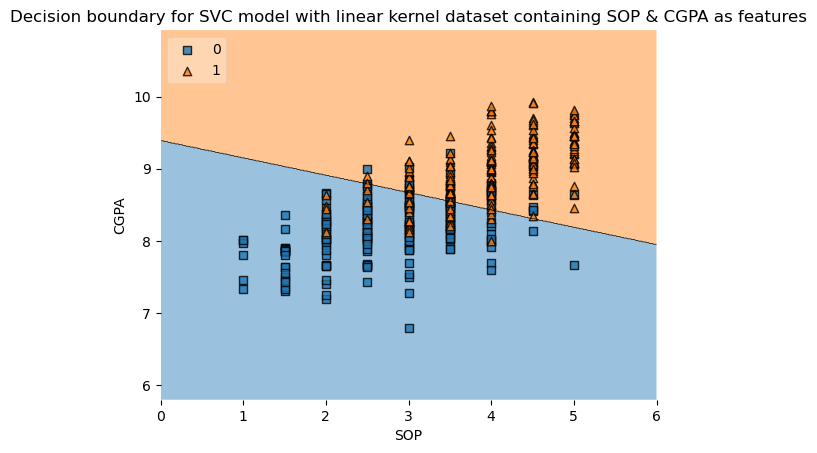

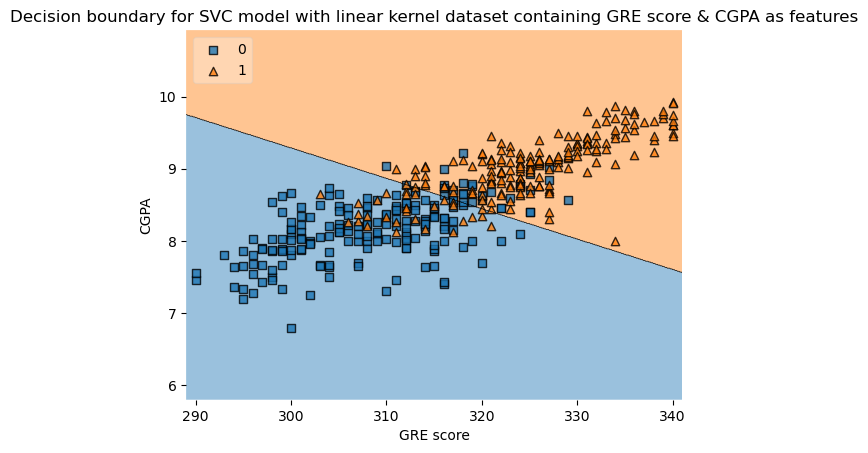

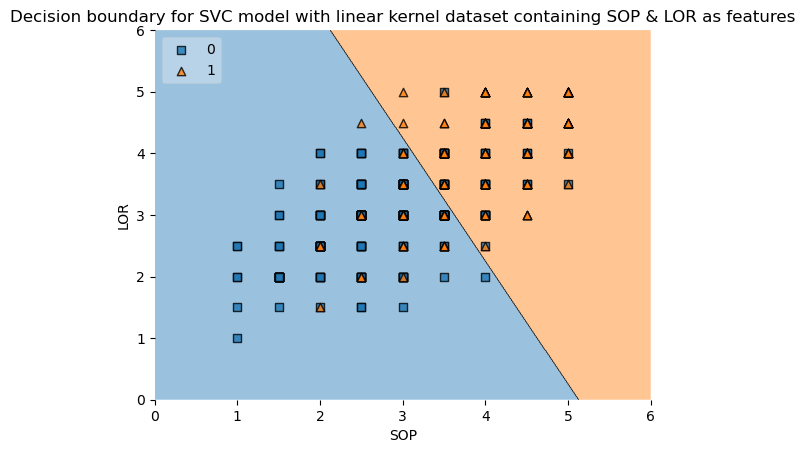

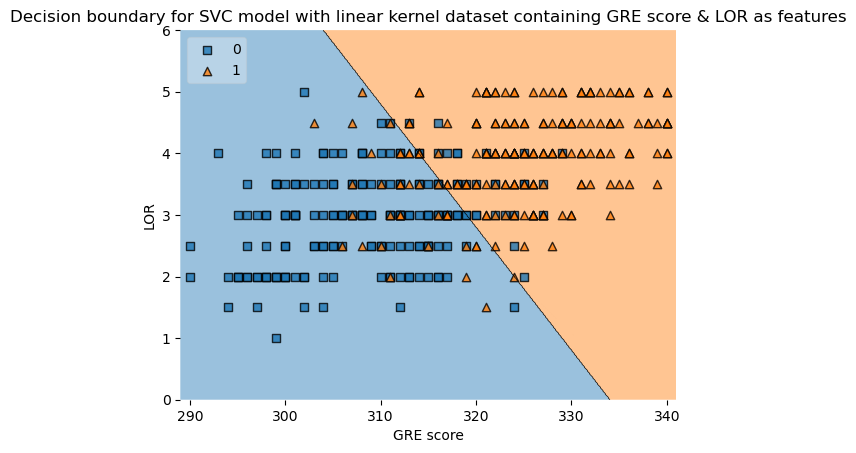

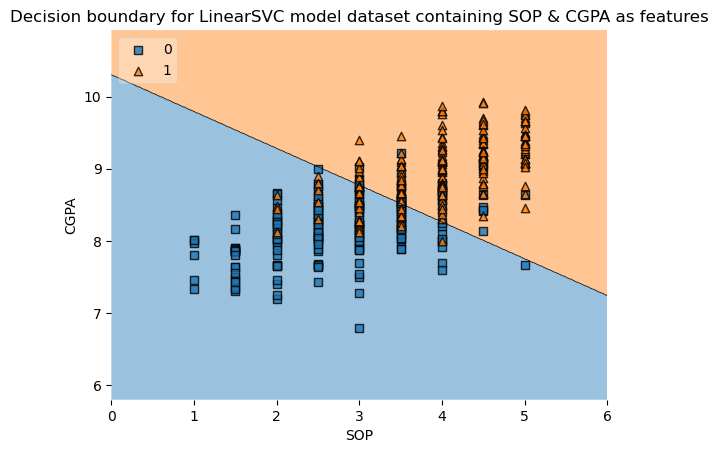

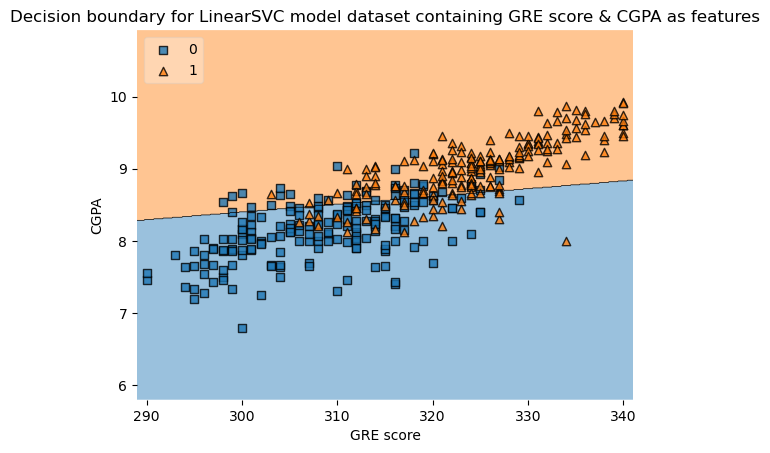

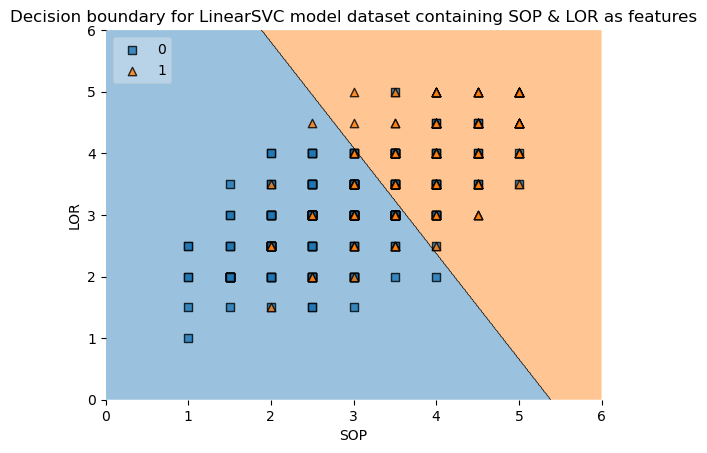

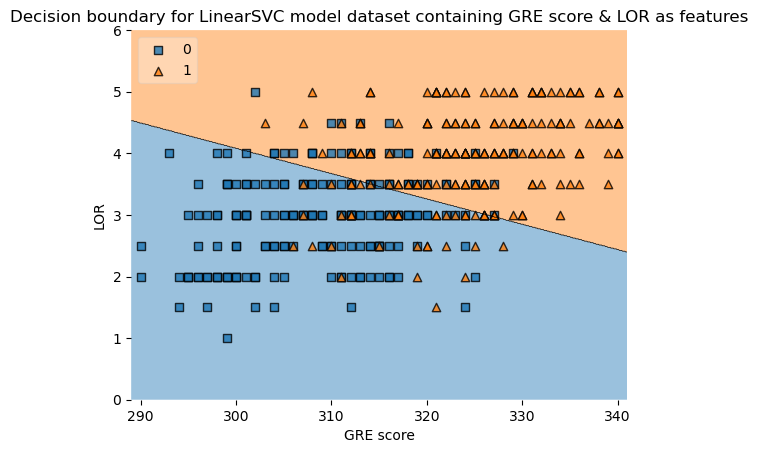

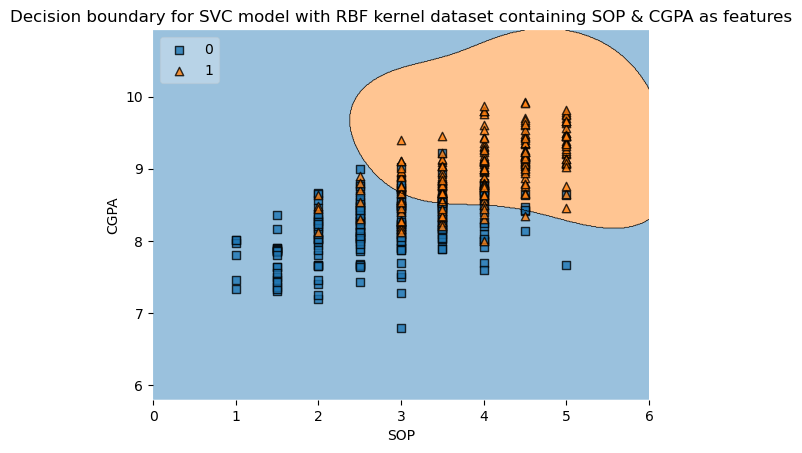

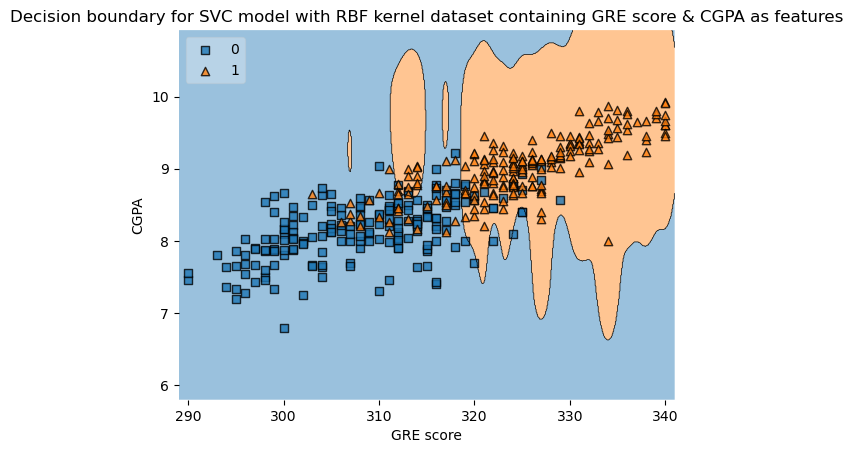

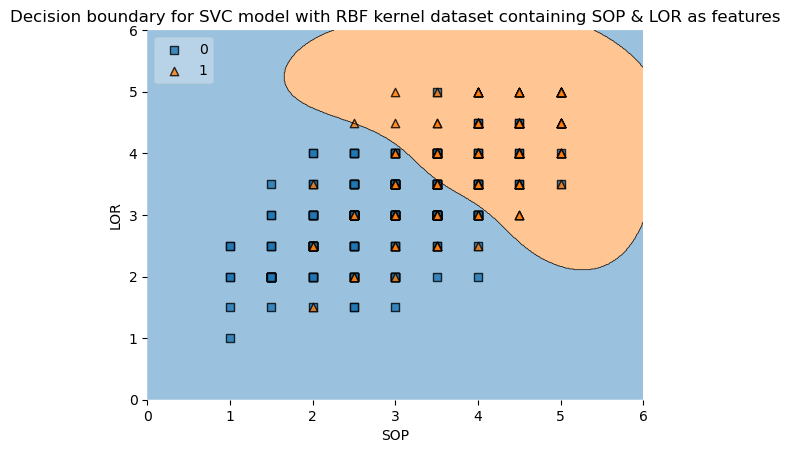

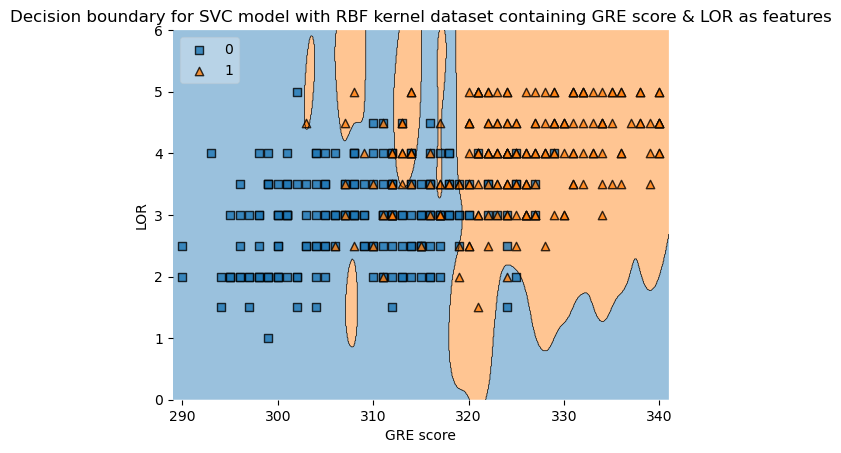

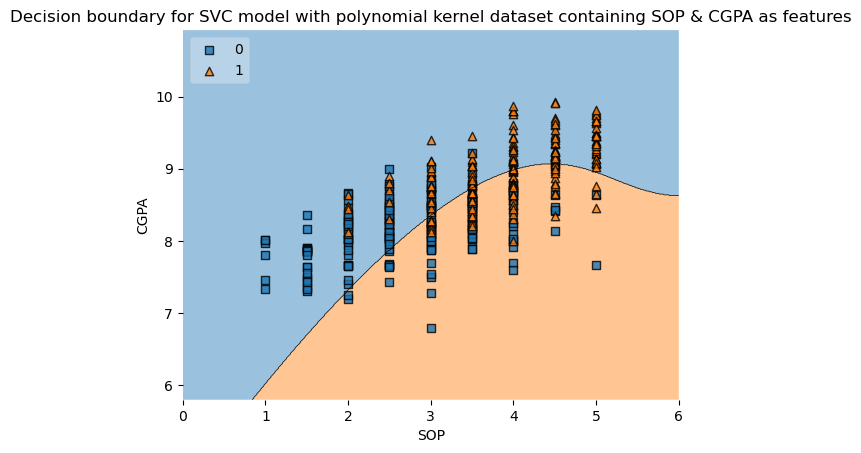

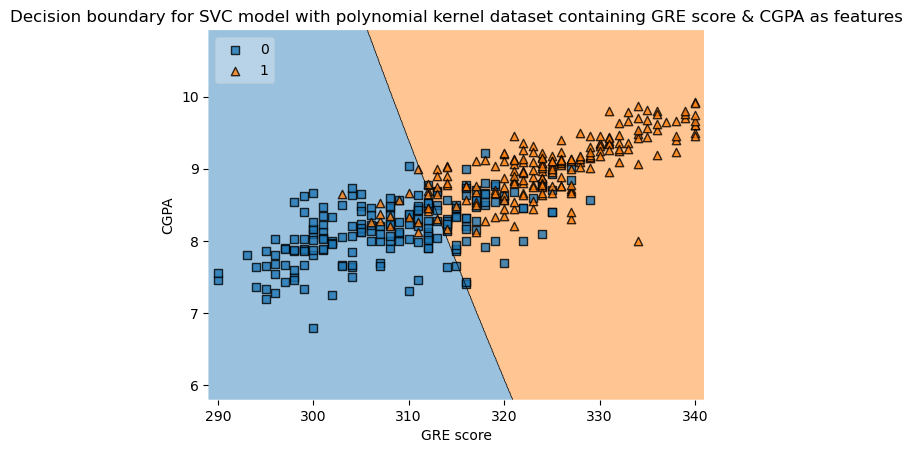

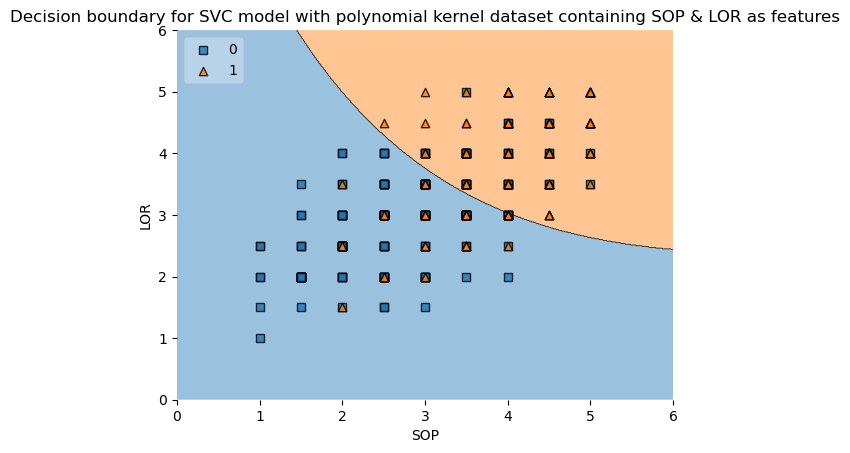

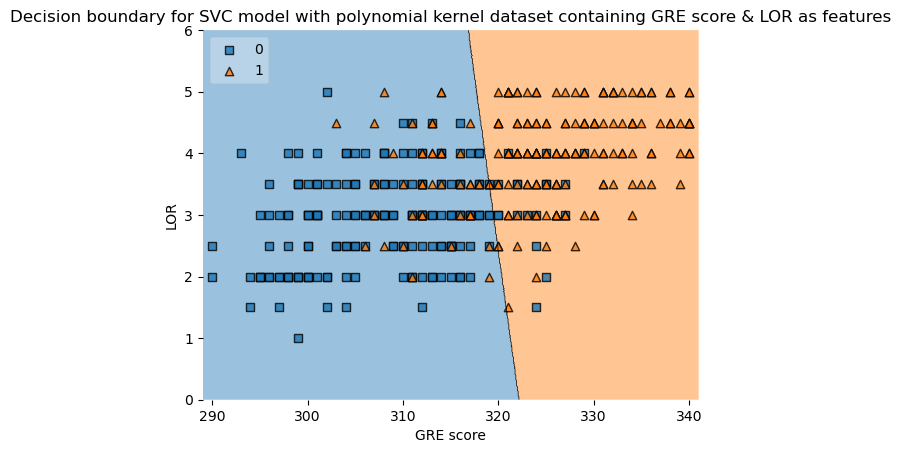

In [236]:

# function to train the model and generate the decision boundary for that model and input dataset
def train_model_and_plot_decision_boundary(model, input_dataset, output, model_description, dataset_description, graph_label):
    input_dataset = np.array(input_dataset)
    output = np.array(output)
    model.fit(input_dataset, output)
    plot_decision_regions(input_dataset, output, clf=model, legend=2)
    plot_graph.xlabel(graph_label[0])
    plot_graph.ylabel(graph_label[1])
    graph_title = "Decision boundary for " + model_description + " " + dataset_description
    plot_graph.title(graph_title)
    plot_graph.show()

warnings.filterwarnings('ignore')
# Training each model with different combinations of datasets and generating the decision boundary
model_description = "SVC model with linear kernel"
for i in range(4):
    train_model_and_plot_decision_boundary(svc_model_with_linear_kernel, input_datasets[i], transformed_output, model_description, dataset_description[i], input_labels[i])

model_description = "LinearSVC model"
for i in range(4):
    train_model_and_plot_decision_boundary(linear_svc_model, input_datasets[i], transformed_output, model_description, dataset_description[i], input_labels[i])

model_description = "SVC model with RBF kernel"
for i in range(4):
    train_model_and_plot_decision_boundary(svc_model_with_rbf_kernel, input_datasets[i], transformed_output, model_description, dataset_description[i], input_labels[i])

model_description = "SVC model with polynomial kernel"
for i in range(4):
    train_model_and_plot_decision_boundary(svc_model_with_polynomial_kernel, input_datasets[i], transformed_output, model_description, dataset_description[i], input_labels[i])







### 2-E: Result Analysis

Just by looking at the figures you generated before, answer the following question. Which of the feature + kernel combinations did give you the best result?

Out of the combinations, the following combination gave the best result:

SVC model with RBL kernel

GRE score & LOR 

### 2-F: Result Postprocessing

Were there any outliers in the data? If yes, please explain how we can use a one-class SVM to detect them.

Yes, there are outliers in the data (this can be inferred by observing the decision boundary for LinearSVC model dataset containing GRE score & LOR as features.

We can identify these outliers using a one-class SVM by following the below steps:

1) Let's train the one-class SVM model on the majority class (ie. majority of the given data that are considered to be the normal class) 

2) This will help us identify the outliers as the samples that have a significant deviation from the majority class (the normal behaviour which was learnt by the model).



